# **Homework Five**


•	(Ungraded, but as always, completion still counts!) DataCamp Data Ingestion & inspection, and Exploratory data analysis

•	(Ungraded) Reading Vanderplas Chapters 2 & 3 (https://jakevdp.github.io/PythonDataScienceHandbook/)

•	(Graded) Part I: Gaddis 11.3 (Follow prompts below), Part II: Data exercise below (Enter your code whereever it says # Your code here)

# ** Part I (Gaddis 11.3)**

Below is a class named <span style="color:green"> Person </span> with data attributes for a person’s ** name, address, and telephone number**. Next, write a class named <span style="color:green"> Customer </span> that is a subclass of the Person class. The <span style="color:green"> Customer </span> class should have a data attribute for a **customer number**, and a Boolean data attribute, **on_list**, indicating whether the customer wishes to be on a mailing list. The <span style="color:green"> Customer </span> class should also have a method that asks the user if they want to be on the list (y/n), and then assigns that to the on_list attribute. Demonstrate an instance of the <span style="color:green"> Customer </span> class in a simple program. (This is a short problem, so don't overthink it.)


In [65]:
class Person:
    def __init__(self, name, address, phone_number):
        self.name = name
        self.address = address
        self.phone_number = phone_number

In [66]:
class Customer(Person):
    def __init__(self, name, address, phone_number, cust_number, on_list):
        # Your code here
        Person.__init__(self, name, address, phone_number)
        self.cust_number = cust_number
        self.on_list = on_list

    def set_on_list(self):
        # Your code here
        self.on_list = input("Do you want to be on the list? (y for yes, n for no)")

1. Create an instance of the Customer class called Jane, instantiating Jane with 'n' for the on-list attribute. 
2. Then call the set_on_list() method for Jane, and respond 'y'
3. Call the Jane.on_list attribute to show that on_list changed from 'n' to 'y'

In [69]:
# Your code here after Jane
Jane = Customer("Jane", "123 Street", 1234567890, 12345, "n")

Jane.set_on_list()

Jane.on_list

Do you want to be on the list? (y for yes, n for no)y


'y'

# Part II (Data)

a) Use the bmore.csv dataset for this homework. Make sure your output does not display errors. 
Import the data into a DataFrame and describe the data.

In [46]:
import time                     
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import statsmodels.formula.api as sm
from patsy import dmatrices

# Your code here to load the csv file
df = pd.read_csv("bmore.csv")

df.describe()


,Population,Median_Income,Unemployed,Families_in_Poverty,Bachelors_degree,Juvenile_Arrest_Rate,Homicide_Incidence_Rate,Unnamed: 8
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,11214.581818,40319.454545,0.116727,0.158364,0.258727,162.874545,21.463636,71.498182
std,4340.770727,16405.020242,0.055044,0.102158,0.208060,132.828931,15.525777,4.782897
min,4097.000000,13388.000000,0.030000,0.000000,0.040000,17.800000,0.000000,62.900000
25%,7840.500000,30228.500000,0.075000,0.090000,0.085000,79.100000,9.300000,68.150000
50%,9874.000000,36632.000000,0.110000,0.130000,0.180000,129.400000,19.000000,71.900000
75%,14675.000000,47744.500000,0.150000,0.210000,0.370000,210.550000,29.500000,74.300000
max,23557.000000,90492.000000,0.280000,0.490000,0.750000,906.700000,61.800000,83.100000


b) Report summary statistics (e.g., mean, median, and standard deviations) of all numerical
variables using numpy's methods. That is, print a table that says something like this:

** variable 1 name **

mean(Variable 1)

median(variable 1)

stand.Dev.(Variable 1)



** variable 2 name**

mean(Variable 2)

median(variable 2)

mode(variable 2)

In [35]:
for x in df.columns:
    if (df[x].dtypes) == np.dtype('O'):
        # This if statement says, data type is a string/word, don't attempt to calculate stats
        pass
    else: 
        # Your code here
        print(x, "\n",str("mean: "), df[x].mean(), "\n" ,str("median: "), df[x].median(),\
              "\n", str("std: "), df[x].std(), "\n")

Population 
 mean:  11214.581818181818 
 median:  9874.0 
 std:  4340.770727309922 

Median_Income 
 mean:  40319.454545454544 
 median:  36632.0 
 std:  16405.020242030005 

Unemployed 
 mean:  0.11672727272727272 
 median:  0.11 
 std:  0.05504390656404802 

Families_in_Poverty 
 mean:  0.15836363636363637 
 median:  0.13 
 std:  0.10215753333044812 

Bachelors_degree 
 mean:  0.2587272727272728 
 median:  0.18 
 std:  0.20806030594299071 

Juvenile_Arrest_Rate 
 mean:  162.87454545454545 
 median:  129.4 
 std:  132.82893094361222 

Homicide_Incidence_Rate 
 mean:  21.463636363636365 
 median:  19.0 
 std:  15.525777414022281 

Unnamed: 8 
 mean:  71.49818181818182 
 median:  71.9 
 std:  4.782897421449444 



Make a scatterplot of Median Income and Bachelors degree. The latter variable measures the
percentage of the population in the county that has a bachelors degree. Label the x-axis "Percent Bachelors Degree", and make the title "Scatterpolt of Median Income and Bachelors Degree."

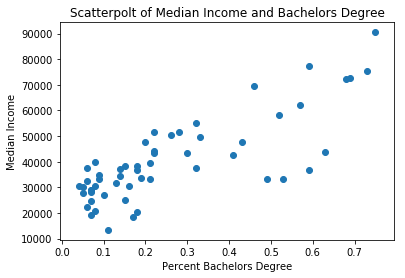

In [72]:
# Show graphs within the Python notebook use matplotlib inline command
%matplotlib inline

# Your code here
#fig = plt.figure()
#axs = plt.axes()

plt.scatter(x = df['Bachelors_degree'], y = df['Median_Income'])

plt.title("Scatterpolt of Median Income and Bachelors Degree")
plt.xlabel("Percent Bachelors Degree")
plt.ylabel("Median Income")

plt.show()

Run a regression model of the following form:
Report a table with all coefficient estimates including p-values.

$$\textrm{Juvenile_Arrest_Rate} = 
\beta_0 + \beta_1\textrm{Population} + \beta_2\textrm{Median_Income} + \beta_3\textrm{Unemployment} + \beta4\textrm{Education} + \beta_5\textrm{Poverty} + \epsilon $$

In [55]:
# Create a fitted model
# Your code here
lm = sm.ols(formula = 'Juvenile_Arrest_Rate ~ Population + Median_Income + Unemployed + Bachelors_degree + Families_in_Poverty', data = df).fit()

# Your code here: print model summary
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     Juvenile_Arrest_Rate   R-squared:                       0.415
Model:                              OLS   Adj. R-squared:                  0.356
Method:                   Least Squares   F-statistic:                     6.963
Date:                  Thu, 17 May 2018   Prob (F-statistic):           5.55e-05
Time:                          18:27:40   Log-Likelihood:                -331.67
No. Observations:                    55   AIC:                             675.3
Df Residuals:                        49   BIC:                             687.4
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

Interpret the coefficient on median income. A \$1 dollar increase in median income will decrease the incarceration rate by how much? What about a \$1,000 increase?

# Your response here


In [11]:
# Enter your interpretation of the coefficient
#Holding everything else constant, for every dollar increase in the median income, the Juvenile Arrest Rate
#decreases approximately by 0.39%